# generation of a document of plots
Tim Tyree<br>
9.4.2021

In [2]:
from lib.my_initialization import *
from lib import *
%load_ext autoreload
%autoreload 2

import random,scipy
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import CloughTocher2DInterpolator
import matplotlib as mpl #for colorbar
from scipy import stats
#DONE: hook this routine up to dask
#DONT: hook this routine up to dask_cuda

from lib.viewer.gener_q_vs_w_for_df import *
from lib.routines.gener_pdf_for_top_trials import *

In [2]:
# # For darkmode plots
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

__GOALS: for Tim (getting final results for PRL paper__
- TODO: put a,D measurements from full models into a table with uncertainty
- TODO: find some plots with low rmse_full and comparable a,D values
- TODO: interpolate from a,D to get some value for r 
- TODO: interpolate from a,D to get some value for kappa
- TODO: look at upper and lower bounds for r,kappa using the boundaries of the 95% CI for a,D
- TODO: put these parameter values in a table
- TODO: plot the results for those parameter values

# generate a pdf with the top N trials only

In [ ]:
input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_18_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_17_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/black_star_run_1_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_15_all_powerlaw_fits.csv"


#DONE: wrap all ^this into a function
#DONE: call the function repeatably with the other model_name_full and a 10X larger num_points
bluf_dir=gener_bluf_q_vs_w_for_top_powerlaw_fits(input_fn,model_name_full='fk_pbc',num_points=25)
beep(3)

#open the outputed .pdf automatically
import webbrowser
webbrowser.open_new(r'file://' + bluf_dir);

#DONE: repeat with LR model
bluf_dir=gener_bluf_q_vs_w_for_top_powerlaw_fits(input_fn,model_name_full='lr_pbc',num_points=25)
beep(3)

# #open the outputed .pdf automatically
# import webbrowser
# webbrowser.open_new(r'file://' + bluf_dir);

bluf_dir=gener_bluf_q_vs_w_for_top_powerlaw_fits(input_fn,model_name_full='fk_pbc',num_points=250)
# #open the outputed .pdf automatically
# import webbrowser
# webbrowser.open_new(r'file://' + bluf_dir);

bluf_dir=gener_bluf_q_vs_w_for_top_powerlaw_fits(input_fn,model_name_full='lr_pbc',num_points=250)
# #open the outputed .pdf automatically
# import webbrowser
# webbrowser.open_new(r'file://' + bluf_dir);

In [33]:
#get the xy values for the top k models

#DONE: wrap all ^this into a function
#DONE: call the function repeatably with the other model_name_full and a 10X larger num_points
bluf_dir=gener_bluf_q_vs_w_for_top_powerlaw_fits(input_fn,model_name_full='fk_pbc',num_points=25)
beep(3)

#open the outputed .pdf automatically
import webbrowser
webbrowser.open_new(r'file://' + bluf_dir);

#DONE: repeat with LR model
bluf_dir=gener_bluf_q_vs_w_for_top_powerlaw_fits(input_fn,model_name_full='lr_pbc',num_points=25)
beep(3)

# #open the outputed .pdf automatically
# import webbrowser
# webbrowser.open_new(r'file://' + bluf_dir);

bluf_dir=gener_bluf_q_vs_w_for_top_powerlaw_fits(input_fn,model_name_full='fk_pbc',num_points=250)
# #open the outputed .pdf automatically
# import webbrowser
# webbrowser.open_new(r'file://' + bluf_dir);

bluf_dir=gener_bluf_q_vs_w_for_top_powerlaw_fits(input_fn,model_name_full='lr_pbc',num_points=250)
# #open the outputed .pdf automatically
# import webbrowser
# webbrowser.open_new(r'file://' + bluf_dir);

# generate a document for all trials considered

In [3]:
#the first bluf routine start to finish
# input_fn=search_for_file()
input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_18_all/job.out.16106771.17"

# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_16_all/job.out.14688026.0"
bluf_dir=gener_bluf_q_vs_w_for_csv_folder(input_fn,max_num_trials=300)
# gener_bluf(task_lst, bluf_dir, bbox_inches='tight', save_tight=True)
beep(3)

#open the outputed .pdf automatically
import webbrowser
webbrowser.open_new(r'file://' + bluf_dir);

# example plots

In [8]:
input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_18_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_17_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/black_star_run_1_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_15_all_powerlaw_fits.csv"
df=pd.read_csv(input_fn)
df.head()

,m,Delta_m,M,Delta_M,Rsq,rmse,rmse_full,model_name_full,q_min,q_max,...,D,varkappa,x0,L,force_code,neighbor,reflect,set_second,no_repulsion,no_attraction
0,1.634225,0.011923,17.072853,0.539172,0.998796,0.213009,0.349726,lr_pbc,0.1,1.0,...,0.26706,10.80550,0,10,2,0,0,0,0,0
1,1.909927,0.025313,5.893359,0.282508,0.996038,0.184324,0.286524,fk_pbc,0.1,1.0,...,0.13358,1.63007,0,10,2,0,1,0,0,0
2,1.653182,0.024584,17.213944,1.098278,0.995017,0.522481,0.679965,lr_pbc,0.1,1.0,...,0.58586,8.73253,0,10,2,0,0,0,0,0
3,1.689880,0.015893,9.883946,0.345165,0.998001,0.165833,1.628595,fk_ncbc,0.1,1.0,...,0.35366,4.98720,0,10,2,0,1,0,0,0
4,1.706467,0.023508,12.187740,0.659933,0.995721,0.336254,2.128713,lr_ncbc,0.1,1.0,...,0.64805,5.59830,0,10,2,0,1,0,0,0


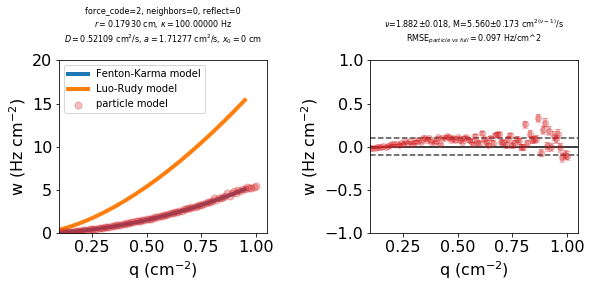

In [32]:
#test the plotters for 1 fn
# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_16_all/job.out.14688026.0"
#plot figure-ready plots for one trial
fig,axs=plt.subplots(ncols=2,figsize=(12,6))
retval=q_vs_w_plotter_function_from_df(axs[0],df=dg)
# assert(retval)
retval=q_vs_Delta_w_plotter_function_from_df(axs[1],df=dg)
# assert(retval)
axs[0].margins(x=0.95,y=0.95)
axs[1].margins(x=0.95,y=0.95)

left_margin=0.2
right_margin=0.2
top_margin=0.4
bottom_margin=0.2
wspace=0.5
hspace=0.2


plt.subplots_adjust(left=left_margin, bottom=bottom_margin, right=1-right_margin, top=1-top_margin, wspace=wspace, hspace=hspace)


# plt.tight_layout()
plt.show()

In [30]:
#plot the top trial as an example plot
#load the collection of all such rates
raw_data_dir=input_fn.replace('_powerlaw_fits.csv','.csv')
df_raw=pd.read_csv(raw_data_dir)
df=df_raw
df['A']=df['L']**2
df['q']=df['N']/df['A'] #number of tips per square centimeter
df['w']=df['CollRate']/df['A'] #[mHz?]/cm^2

#define constant parameters
reflect=0
force_code=2
set_second=0
neighbor=0
no_attraction=0
no_repulsion=0
x0=0
L=10

#template query for the DataFrame
df=df_raw.copy()
query =(df.set_second==set_second)
query&=(df.no_repulsion==no_repulsion)&(df.no_attraction==no_attraction)
query&=(df.neighbor==neighbor)&(df.force_code==force_code)
query&=df.L==L
query&=df.x0==x0
query&=(df.reflect==reflect)
query_template=query.copy()

#initialize task list as in the previous bluf routine
for r,kappa,varkappa,D in zip(dict_best['r'],dict_best['kappa'],dict_best['varkappa'],dict_best['D']):
    #query for the xy values for the top model
    query=query_template.copy()
    query&=df.r==r
    query&=df.kappa==kappa
    query&=df.varkappa==varkappa
    query&=df.D==D
    dg=df[query].copy()

In [29]:
print(*dict_best)

r kappa D varkappa x0 L force_code neighbor reflect set_second no_repulsion no_attraction


In [28]:
dict_best=return_best_trial_parameters(input_fn,model_name_full='fk_pbc',num_points=25)


In [39]:
#TODO(first, find/ask wj for an uncertainty estimate for his data... Tell wj that my uncertainty esimate is about 1% for a 95% confidence that my values are accurate to 1% of their groundtruth value): make error bars also include the variance from the full model 

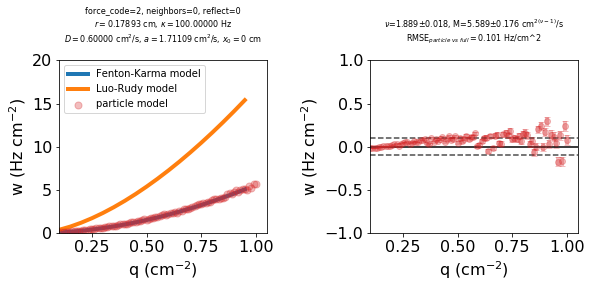

In [5]:
#test the plotters for 1 fn
# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_16_all/job.out.14688026.0"
#plot figure-ready plots for one trial
fig,axs=plt.subplots(ncols=2,figsize=(12,6))
retval=q_vs_w_plotter_function(axs[0],data=input_fn)
# assert(retval)
retval=q_vs_Delta_w_plotter_function(axs[1],data=input_fn)
# assert(retval)
axs[0].margins(x=0.95,y=0.95)
axs[1].margins(x=0.95,y=0.95)

left_margin=0.2
right_margin=0.2
top_margin=0.4
bottom_margin=0.2
wspace=0.5
hspace=0.2


plt.subplots_adjust(left=left_margin, bottom=bottom_margin, right=1-right_margin, top=1-top_margin, wspace=wspace, hspace=hspace)
# plt.tight_layout()
plt.show()

__Introductary Notes__
- here, the powerlaw fit is w=M*q**m, and Delta_X is the maximum disagreement one could expect to observe with 95% confidence.
- here, we observe Delta_X concerns disagreements between statistically independent measurements of X.
- ...

__Notes on nonsense local data__
- I still cannot explain/reproduce the anomalous drop in reaction rates
- This doesn't seem to be a problem with the remote data generation pipeline
- Quickest fix is to dev run 16 to run the ~55 jobs I have right now in run_15_all_ar_star.csv

__Notes on remote data__
- appears monotonic from a first glance at the raw numbers...
- this is fine... I suspect the problem with having two jobs on the same machine is that they save to the same tmp files.  The simple solution, just run the trials on different machines on a remote cluster....

__A note on this data from the local pipeline__<br>
this data from the local pipeline is not making sense... there's a million moving parts, and i have recently used the remote pipeline... Maybe they cross talked because they print helper files to the same directories... Yep... I'd bet that's causing the wonky reads.  I have verified the problem does not exist in the funcitonal string formatting...  Therefore, we have the courage to say...

 __DONE:__ dev quick ar_star remote data run with 55 jobs gener_run_16.py and run it on the cloud!
 
 Now... Let's analyze ^these nifty repeatable results
 
 
- TODO(if results are spectacular): automate repeatable results to machine precision by making a copy of the main .submit file in c/attractive/ with every randomization seed set to 1234...

# visualize the parameters of the best few trials from power law fits to the full models

In [9]:
input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_18_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_17_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/black_star_run_1_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_15_all_powerlaw_fits.csv"

df=pd.read_csv(input_fn)
df.head()

,m,Delta_m,M,Delta_M,Rsq,rmse,rmse_full,model_name_full,q_min,q_max,...,D,varkappa,x0,L,force_code,neighbor,reflect,set_second,no_repulsion,no_attraction
0,1.634225,0.011923,17.072853,0.539172,0.998796,0.213009,0.349726,lr_pbc,0.1,1.0,...,0.26706,10.80550,0,10,2,0,0,0,0,0
1,1.909927,0.025313,5.893359,0.282508,0.996038,0.184324,0.286524,fk_pbc,0.1,1.0,...,0.13358,1.63007,0,10,2,0,1,0,0,0
2,1.653182,0.024584,17.213944,1.098278,0.995017,0.522481,0.679965,lr_pbc,0.1,1.0,...,0.58586,8.73253,0,10,2,0,0,0,0,0
3,1.689880,0.015893,9.883946,0.345165,0.998001,0.165833,1.628595,fk_ncbc,0.1,1.0,...,0.35366,4.98720,0,10,2,0,1,0,0,0
4,1.706467,0.023508,12.187740,0.659933,0.995721,0.336254,2.128713,lr_ncbc,0.1,1.0,...,0.64805,5.59830,0,10,2,0,1,0,0,0


In [10]:
#define constant parameters
reflect=0
force_code=2
set_second=0
neighbor=0
no_attraction=0
no_repulsion=0
# kappa=100
L=10

#template query for the DataFrame
query =(df.set_second==set_second)
query&=(df.no_repulsion==no_repulsion)&(df.no_attraction==no_attraction)
query&=(df.neighbor==neighbor)&(df.force_code==force_code)
# query&=df.r==r
# query&=df.kappa==kappa
# query&=df.D==D
query&=df.L==L
query_template=query.copy()


m=45.43124701678633
Delta_m=0.7290676964495653
b=-152.85387787814335
Delta_b=4.624893912947587
Rsquared=0.9984605237666201


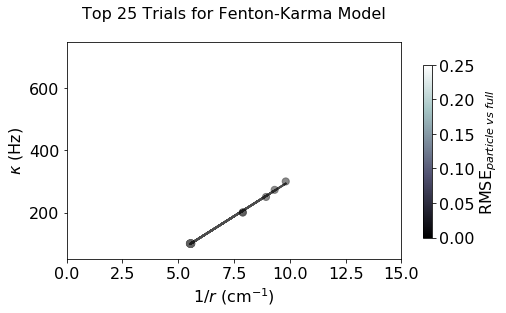

In [11]:
#select only the desired trials for the FK model
reflect=0
model_name_full='fk_pbc'#'lr_pbc'
# model_name_full='lr_pbc'

num_points=25
c_col='rmse_full'
vmin=0.;vmax=.25
fontsize=16
x1lim=[0,15]
x2lim=[50,750]
# x1lim=[5,10]
# x2lim=[50,350]

input_cols=['r','D','varkappa','x0', 'L', 'force_code', 'neighbor', 'reflect', 'set_second',
       'no_repulsion', 'no_attraction']
sortby_col='rmse_full'

query=query_template.copy()
query&=(df.reflect==reflect)
query&=(df.model_name_full==model_name_full)
# query&=df.varkappa==varkappa
# query&=df.x0==x0

if model_name_full=='fk_pbc':
    modelname='Fenton-Karma'
elif model_name_full=='lr_pbc':
    modelname='Luo-Rudy'
else:
    raise(f'Not Yet Implemented! {model_name_full}')
dg=df[query].sort_values(by=sortby_col).copy()

#extract the data
r_values=dg.head(num_points)['r'].values
kappa_values=dg.head(num_points)['kappa'].values
c_values=dg.head(num_points)[c_col].values
x_values=1/r_values
y_values=kappa_values
#perform OLS on x,y
dict_out=compute_95CI_ols(x_values,y_values)
yhat_values=dict_out['m']*x_values+dict_out['b']

#scatter plot the first 100 r,kappa values, coloring by rmse
#TODO: repeat coloring by D
#TODO: repeat coloring by varkappa
fig,ax=plt.subplots()
ax.plot(x_values,yhat_values,c='k',alpha=.7,lw=2)
ax.scatter(x_values,y_values,c=c_values,cmap='gray',alpha=0.7,s=50,vmin=vmin,vmax=vmax)
title=f'Top {num_points} Trials for {modelname} Model\n'
FormatAxes(ax, x1lim=x1lim, x2lim=x2lim, x1label=r'$1/r$ (cm$^{-1}$)', x2label=r'$\kappa$ (Hz)', title=title, fontsize=fontsize, use_loglog=False)
# cbar=fig.colorbar(cmap='bone', ax=ax, shrink=0.6,label=r'RMSE$_{particle\;vs\;full}$')#, location='top'
# fig.colorbar(pcm, ax=[axs[0, col]], location='top', shrink=0.6)
#     cbar=fig.colorbar(pcm, ax=axs[:, col],shrink=0.6)#,label=output_col)

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
cmap = plt.cm.bone
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
cb.set_label(r'RMSE$_{particle\;vs\;full}$',fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

# cbar.ax.tick_params(labelsize=fontsize)
# cbar.set_label(output_col, fontsize=fontsize)
print_dict(dict_out)
plt.show()


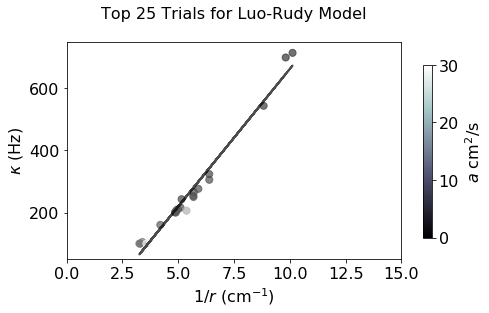

m=88.56572472116645
Delta_m=5.523301857214126
b=-223.64555854032227
Delta_b=31.104443025988168
Rsquared=0.9772445644348985


In [12]:
#select only the desired trials for the FK model
reflect=0
model_name_full='fk_pbc'#'lr_pbc'
model_name_full='lr_pbc'

num_points=25
fontsize=16#select only the desired trials for the FK model
reflect=0
model_name_full='fk_pbc'#'lr_pbc'
model_name_full='lr_pbc'

num_points=25
c_col='varkappa'
clabel=r'$a$ cm$^2$/s'
vmin=0.;vmax=30
fontsize=16
x1lim=[0,15]
x2lim=[50,750]
# x1lim=[5,10]
# x2lim=[50,350]

input_cols=['r','D','varkappa','x0', 'L', 'force_code', 'neighbor', 'reflect', 'set_second',
       'no_repulsion', 'no_attraction']
sortby_col='rmse_full'

query=query_template.copy()
query&=(df.reflect==reflect)
query&=(df.model_name_full==model_name_full)
# query&=df.varkappa==varkappa
# query&=df.x0==x0

if model_name_full=='fk_pbc':
    modelname='Fenton-Karma'
elif model_name_full=='lr_pbc':
    modelname='Luo-Rudy'
else:
    raise(f'Not Yet Implemented! {model_name_full}')
dg=df[query].sort_values(by=sortby_col).copy()

#extract the data
r_values=dg.head(num_points)['r'].values
kappa_values=dg.head(num_points)['kappa'].values
c_values=dg.head(num_points)[c_col].values
x_values=1/r_values
y_values=kappa_values
#perform OLS on x,y
dict_out=compute_95CI_ols(x_values,y_values)
yhat_values=dict_out['m']*x_values+dict_out['b']

#scatter plot the first 100 r,kappa values, coloring by rmse
#TODO: repeat coloring by D
#TODO: repeat coloring by varkappa
fig,ax=plt.subplots()
ax.plot(x_values,yhat_values,c='k',alpha=.7,lw=2)
ax.scatter(x_values,y_values,c=c_values,cmap='gray',alpha=0.7,s=50,vmin=vmin,vmax=vmax)
title=f'Top {num_points} Trials for {modelname} Model\n'
FormatAxes(ax, x1lim=x1lim, x2lim=x2lim, x1label=r'$1/r$ (cm$^{-1}$)', x2label=r'$\kappa$ (Hz)', title=title, fontsize=fontsize, use_loglog=False)

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
cmap = plt.cm.bone
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
cb.set_label(clabel,fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

# cbar.ax.tick_params(labelsize=fontsize)
# cbar.set_label(output_col, fontsize=fontsize)

plt.show()
print_dict(dict_out)


In [16]:
df['l']=df['varkappa']/(df['kappa']*df['r'])     #cm
df['lt']=df['varkappa']/(df['kappa']*df['r'])**2 #seconds

mup=.5
df['K']=df['varkappa']*(df['kappa']*df['r'])**mup
df['J']=df['varkappa']*np.sqrt(df['kappa']*df['r'])

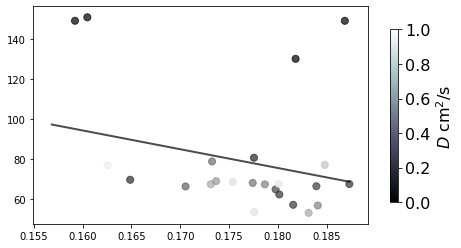

m=-940.5021963041006
Delta_m=1341.686323862718
b=244.87806855651297
Delta_b=236.12436845670143
Rsquared=0.07584819741533057


In [26]:
#select only the desired trials for the FK model
reflect=0
model_name_full='fk_pbc'#'lr_pbc'
model_name_full='lr_pbc'

num_points=25
c_col='D'
clabel=r'$D$ cm$^2$/s'
vmin=0.;vmax=30
fontsize=16
x1lim=[0,15]
x2lim=[50,750]
# x1lim=[5,10]
# x2lim=[50,350]

input_cols=['r','D','varkappa','x0', 'L', 'force_code', 'neighbor', 'reflect', 'set_second',
       'no_repulsion', 'no_attraction']
sortby_col='rmse_full'

query=query_template.copy()
query&=(df.reflect==reflect)
query&=(df.model_name_full==model_name_full)
# query&=df.varkappa==varkappa
# query&=df.x0==x0

if model_name_full=='fk_pbc':
    modelname='Fenton-Karma'
elif model_name_full=='lr_pbc':
    modelname='Luo-Rudy'
else:
    raise(f'Not Yet Implemented! {model_name_full}')
dg=df[query].sort_values(by=sortby_col).copy()

#extract the data
c_values=dg.head(num_points)[c_col].values
x_values=dg.head(num_points)['rmse_full'].values
y_values=dg.head(num_points)['K'].values
#perform OLS on x,y
dict_out=compute_95CI_ols(x_values,y_values)
yhat_values=dict_out['m']*x_values+dict_out['b']

#scatter plot the first 100 r,kappa values, coloring by rmse
#TODO: repeat coloring by D
#TODO: repeat coloring by varkappa
fig,ax=plt.subplots()
ax.plot(x_values,yhat_values,c='k',alpha=.7,lw=2)
ax.scatter(x_values,y_values,c=c_values,cmap='gray',alpha=0.7,s=50)#,vmin=vmin,vmax=vmax)
title=f'Top {num_points} Trials for {modelname} Model\n'

# FormatAxes(ax, x1lim=x1lim, x2lim=x2lim, x1label=r'$1/r$ (cm$^{-1}$)', x2label=r'$\kappa$ (Hz)', title=title, fontsize=fontsize, use_loglog=False)

import matplotlib as mpl
norm = mpl.colors.Normalize()#vmin=vmin,vmax=vmax)
cmap = plt.cm.bone
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional')
cb.set_label(clabel,fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

# cbar.ax.tick_params(labelsize=fontsize)
# cbar.set_label(output_col, fontsize=fontsize)

plt.show()
print_dict(dict_out)